<a href="https://colab.research.google.com/github/jpwoods1878/titanic-survival-prediction/blob/main/load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jpwoods1878/titanic-survival-prediction.git

Cloning into 'titanic-survival-prediction'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 46 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 48.45 KiB | 3.46 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

project_root = "/content/titanic-survival-prediction"
os.chdir(project_root)
sys.path.append(os.path.join(project_root, "src"))
print("Project root set to:", os.getcwd())

Project root set to: /content/titanic-survival-prediction


# Loading in the data

Load our training data in via pandas, the training set consists of 891 rows. We
have 12 columns. PassengerId which is a unique identifier for each passenger. Survived which will be our target, Pclass is the class the passenger travelled in. Passenger name, age and gender. SibSp which is the count of siblings/spouses on board, Parch which is the number of parents/children on board. Ticket cost, cabin number and ticket number. And finally port of embarkation. Using these features we aim to predict whether a passenger survived or not and we will evaluate our success on the test set.

In [4]:
train_df = pd.read_csv('data/train.csv')
train_df.shape

(891, 12)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

Once we have read the data into our workspace, the next steps are to assess our target and features to get an idea of how we might model this problem.

From the dataframe output above Name, Ticket and Cabin are features that at first glance look useless in their current form. We will need to do some preprocessing to get any use out of these. With some intuition some of the other features seem like good indicators of whether someone would survive the disaster, for instance perhaps younger age passengers are more likely to survive, or passengers travelling in a higher class. We will summarise these fields below to find out if this really was case.

We can also see that we have some null values in some of our features that we will need to impute, we will come back to these later.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The target variable shows a 62% vs. 38% distribution, with the majority of passengers not surviving the disaster. Other than the fact this shows what a tragic event this was, for us it epresents a moderate class imbalance, but not an extreme one. Most standard models can handle this level of imbalance without special techniques such as SMOTE, class-weighting, or resampling.

However, since accuracy can be misleading in imbalanced datasets, evaluation metrics like precision, recall, F1-score, ROC-AUC, and confusion matrices will give a more reliable picture of performance.

In [8]:
train_df['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


<Axes: xlabel='Survived', ylabel='count'>

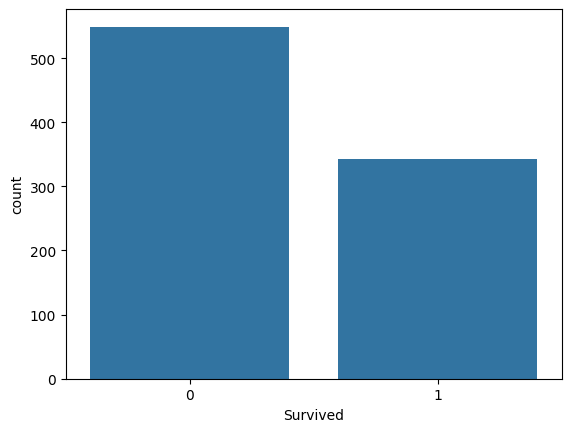

In [9]:
import seaborn as sns
sns.countplot(x='Survived', data=train_df)


We will start by examining the numerical features and guaging how they interact with our target.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

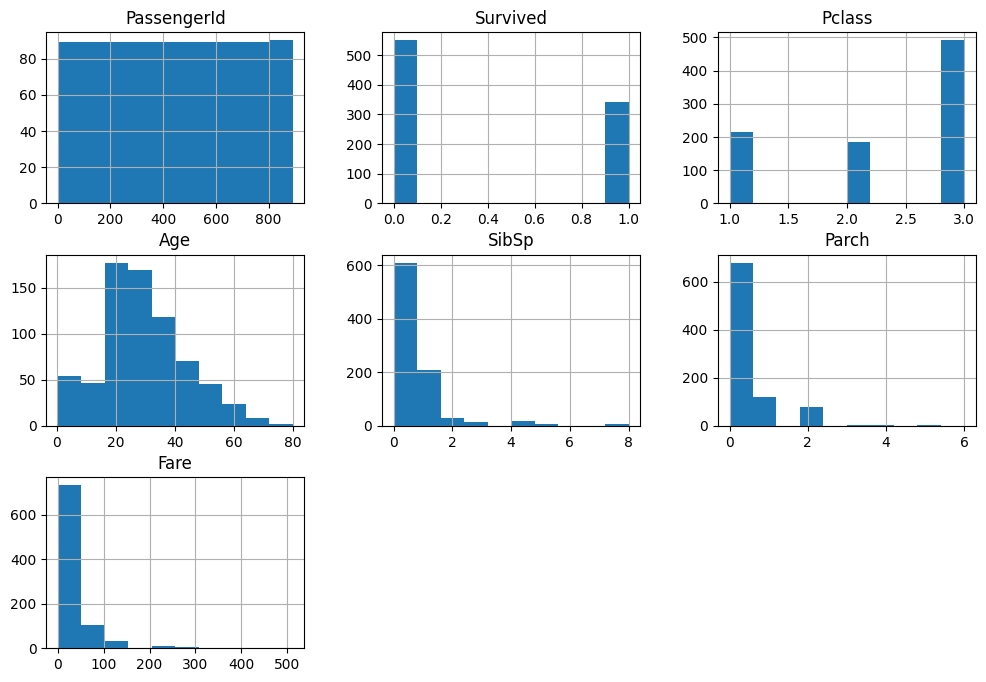

In [10]:
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
train_df[num_cols].hist(figsize=(12,8))
